In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. 데이터 불러오기 및 탐색

In [400]:
tit = pd.read_csv('./titanic.csv', index_col = 0)

In [11]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
tit.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
tit.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [36]:
tit

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


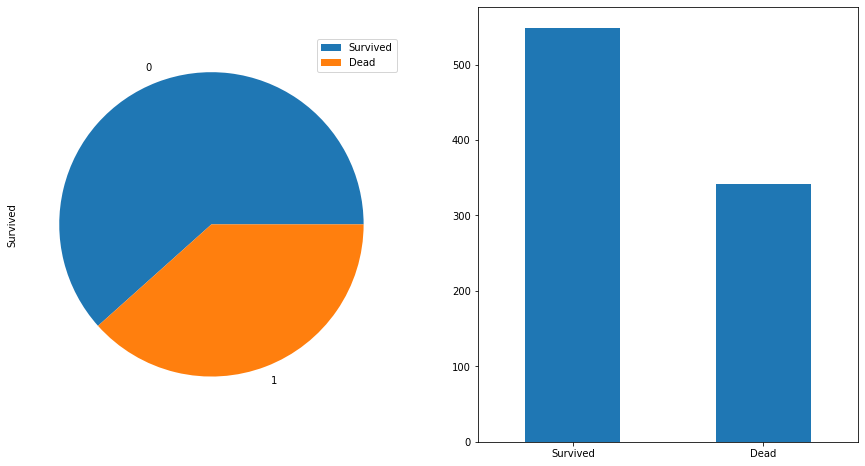

In [320]:
f, ax = plt.subplots(1, 2, figsize=(15,8))
tit['Survived'].value_counts().plot.pie(rot = 0, ax = ax[0])
ax[0].legend(['Survived', 'Dead'])
tit['Survived'].value_counts().plot.bar(rot = 0, ax = ax[1])
ax[1].set_xticklabels(labels = ['Survived', 'Dead'])
plt.show()

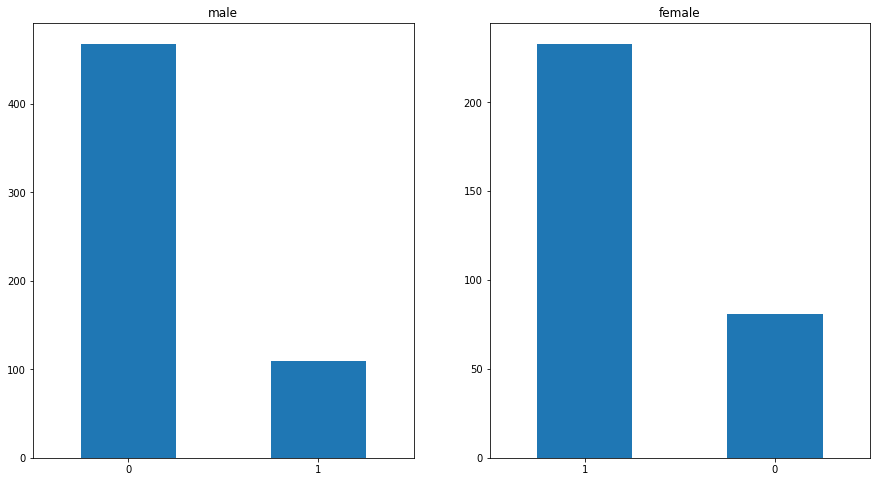

In [44]:
f, ax = plt.subplots(1, 2, figsize=(15,8))
tit.loc[tit['Sex'] == 'male', 'Survived'].value_counts().plot.bar(rot = 0, ax = ax[0])
ax[0].set_title('male')
tit.loc[tit['Sex'] == 'female', 'Survived'].value_counts().plot.bar(rot = 0, ax = ax[1])
ax[1].set_title('female')
plt.show()

# 2. 데이터 시각화 및 탐색

In [51]:
pd.pivot_table(tit, index = 'Pclass', columns = 'Survived', values = 'Name', aggfunc='count', fill_value=0)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [321]:
pd.crosstab(tit['Pclass'], tit['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


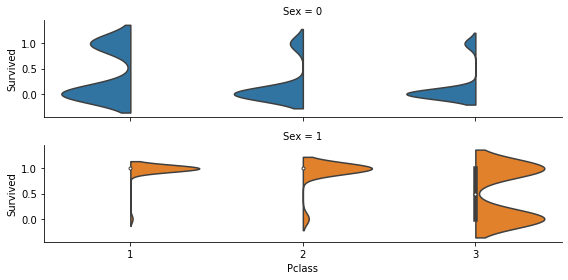

In [328]:
sns.catplot(x="Pclass", y="Survived", hue="Sex", row="Sex", data=tit,
            kind="violin", split=True, height=2, aspect=4)
plt.show()

In [326]:
tit.Pclass = tit.Pclass.astype(str)

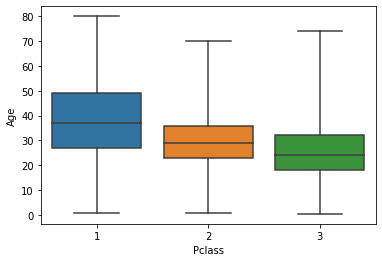

In [63]:
sns.boxplot(x="Pclass", y="Age", data=tit, whis=np.inf)
plt.show()

In [204]:
columns = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

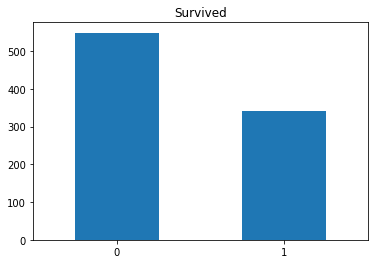

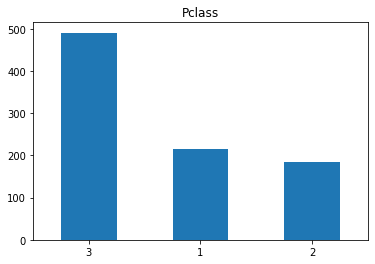

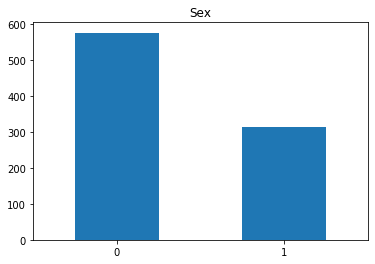

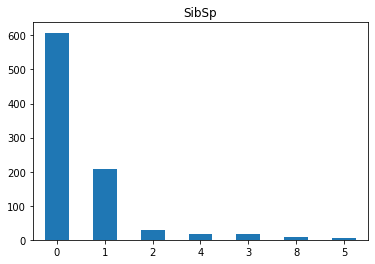

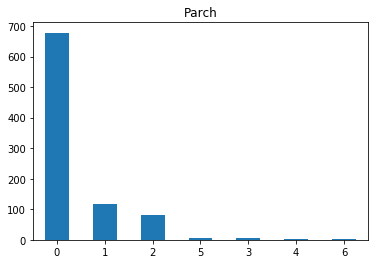

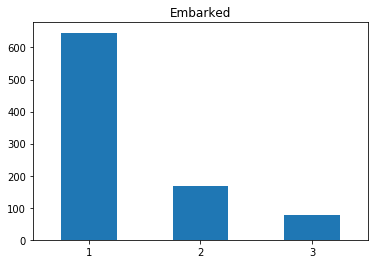

In [213]:
for column in columns:
    tit[column].value_counts().plot.bar(rot = 0)
    plt.xticks()
    plt.title(column)
    plt.show()

In [ ]:
data = []
tit.loc[tit['Cabin'].notnull(), 'Cabin'].apply(lambda x : data.extend(list(map(lambda x : x[:1], x.split(' ')))))

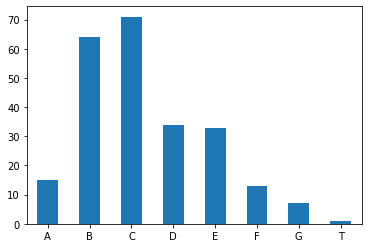

In [97]:
pd.Series(data).value_counts().sort_index().plot.bar(rot = 0)
plt.show()

# 3. 전처리

In [98]:
tit

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [432]:
tit['Agegroup'] = tit['Age'].apply(lambda x : 'baby' if (x > 0) & (x < 5) else (
            'Child' if (x > 5) & (x <= 12) else(
            'Teenager' if (x > 12) & (x <= 18) else(
            'Student' if (x > 18) & (x <= 24) else(
            'Young Adult' if (x > 24) & (x <= 35) else(
            'Adult' if (x > 35) & (x <= 60) else(
            'Senior' if x > 60 else 'Unknown'
            )))))))

In [403]:
tit.drop(['Cabin', 'Ticket', 'Age'], axis = 1)

,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Agegroup
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,Student
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,Adult
3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,Young Adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,Young Adult
5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,Young Adult
...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,0,0,13.0000,S,Young Adult
888,1,1,"Graham, Miss. Margaret Edith",female,0,0,30.0000,S,Student
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,23.4500,S,Unknown


In [433]:
tit.loc[tit['Embarked'].isnull(), 'Embarked'] = 'S'

In [439]:
namedict = {
    'Dona' : 0, 'Don':0, 'Rev':0, 'Capt':0, 'Jonkheer':0, 'Mr':1, 'Dr':2, 'Major':3, 'Col':3, 'Master':4, 'Miss':5, 'Mrs':6, 'Mme':7,'Ms':7,'Lady':7, 'Sir':7, 'Mlle':7, 'the Countess':7 
}

In [440]:
tit['Name'] = tit['Name'].apply(lambda x : namedict[x.split(',')[1].split('.')[0].strip()])

In [441]:
tit['Sex'] = tit['Sex'].apply(lambda x : 1 if x == 'female' else 0)

In [442]:
tit['Embarked'] = tit['Embarked'].apply(lambda x : 1 if x == 'S' else (
    2 if x == 'C' else 3
))

In [443]:
tit['Fare'] = tit['Fare'].apply(lambda x : 0 if x <= 30 else (
    1 if (x > 30) & (x <= 80)  else (
    2 if (x > 80) & (x <= 100)  else 3 
    )))

In [444]:
tit.Cabin = tit.loc[tit['Cabin'].notnull(), 'Cabin'].apply(lambda x : len(x.split(' ')))

In [445]:
tit.Cabin = tit.Cabin.fillna(0)

# 4. 모델 구현

In [446]:
tit.drop('Ticket', axis = 1, inplace = True)

In [413]:
tit

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Agegroup
PassengerId,,,,,,,,,,,
1,0,3,1,0,22.0,1,0,0,0.0,1,Student
2,1,1,6,1,38.0,1,0,1,1.0,2,Adult
3,1,3,5,1,26.0,0,0,0,0.0,1,Young Adult
4,1,1,6,1,35.0,1,0,1,1.0,1,Young Adult
5,0,3,1,0,35.0,0,0,0,0.0,1,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,0,0,27.0,0,0,0,0.0,1,Young Adult
888,1,1,5,1,19.0,0,0,0,1.0,1,Student
889,0,3,5,1,NaN,1,2,0,0.0,1,Unknown


In [447]:
tit['Pclass'] = tit['Pclass'].astype(str)
tit.Name = tit.Name.astype(str)

In [448]:
data = pd.get_dummies(tit)

In [449]:
data = data.fillna(0)

In [450]:
data.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass_1,Pclass_2,...,Name_6,Name_7,Agegroup_Adult,Agegroup_Child,Agegroup_Senior,Agegroup_Student,Agegroup_Teenager,Agegroup_Unknown,Agegroup_Young Adult,Agegroup_baby
0,892,0,34.5,0,0,0,0.0,3,0,0,...,0,0,0,0,0,0,0,0,1,0
1,893,0,47.0,1,0,0,0.0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
2,894,0,62.0,0,0,0,0.0,3,0,1,...,0,0,0,0,1,0,0,0,0,0
3,895,0,27.0,0,0,0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,896,0,22.0,1,1,0,0.0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [453]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(data.iloc[:,1:])
# y = data['Survived']

In [454]:
X = pd.DataFrame(X)

In [455]:
X

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.453947,0.000,0.000000,0.0,0.00,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.618421,0.125,0.000000,0.0,0.00,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.815789,0.000,0.000000,0.0,0.00,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.355263,0.000,0.000000,0.0,0.00,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.289474,0.125,0.111111,0.0,0.00,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,0.000000,0.000,0.000000,0.0,0.00,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
414,0.0,0.513158,0.000,0.000000,1.0,0.25,0.5,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415,0.0,0.506579,0.000,0.000000,0.0,0.00,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
416,0.0,0.000000,0.000,0.000000,0.0,0.00,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [388]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings(action='ignore')


cv = KFold(5, shuffle = True, random_state = 42)
models = [SVC(), LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(n_neighbors = 3), GaussianNB()]

scores = []
for m in list(zip(['svm', 'LR', 'RFO', 'knn', 'GB'], models)):
    for i, (idx_train, idx_test) in enumerate(cv.split(X)):
        x_train = tit.iloc[:,1:].iloc[idx_train]
        y_train = tit.iloc[:,0].iloc[idx_train]
        x_test = tit.iloc[:,1:].iloc[idx_test]
        y_test = tit.iloc[:,0].iloc[idx_test]

        model = m[1]
        result = model.fit(x_train, y_train)

        pred = result.predict(x_test)
        score = result.score(x_test, y_test)
        scores.append(score)
        
    print(m[0], np.mean(scores))

svm 0.8148201619484023
LR 0.8209999372293012
RFO 0.8189379197790471
knn 0.8153788211662796
GB 0.809878852551629


In [421]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [422]:
from keras.models import Sequential
from keras.layers import Dense

In [426]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(26,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 64)                1728      
_________________________________________________________________
dense_38 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 33        
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


In [427]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [428]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Train on 569 samples, validate on 143 samples
Epoch 1/20
569/569 [==============================] - 1s 1ms/step - loss: 0.6452 - acc: 0.6186 - val_loss: 0.6072 - val_acc: 0.6573
Epoch 2/20
569/569 [==============================] - 0s 57us/step - loss: 0.5998 - acc: 0.6801 - val_loss: 0.5606 - val_acc: 0.7413
Epoch 3/20
569/569 [==============================] - 0s 100us/step - loss: 0.5621 - acc: 0.7258 - val_loss: 0.5195 - val_acc: 0.7622
Epoch 4/20
569/569 [==============================] - 0s 72us/step - loss: 0.5291 - acc: 0.7768 - val_loss: 0.4823 - val_acc: 0.7832
Epoch 5/20
569/569 [==============================] - 0s 136us/step - loss: 0.4996 - acc: 0.8084 - val_loss: 0.4514 - val_acc: 0.8322
Epoch 6/20
569/569 [==============================] - 0s 68us/step - loss: 0.4787 - acc: 0.8225 - val_loss: 0.4277 - val_acc: 0.8112
Epoch 7/20
569/569 [==============================] - 0s 65us/step - loss: 0.4612 - acc: 0.8190 - val_loss: 0.4129 - val_acc: 0.8112
Epoch 8/20
569/569 [==

In [429]:
test = pd.read_csv('test.csv')

In [431]:
tit = test.copy()

In [463]:
pred = model.predict_classes(X)

In [468]:
submission = pd.concat([pd.DataFrame(tit.PassengerId), pd.DataFrame(pred)], axis = 1)

In [469]:
submission.to_csv('./submission.csv', index = False)